In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.fft import fft, ifft

N = 256

## Making the Window

In [2]:
def makeWindow(dim, theta, r):
    window = np.zeros((dim, dim, dim))
    x_cen = dim/2
    y_cen = dim/2
    z_cen = -r/np.tan(theta)
    axis = np.array([0, 0, 1])
    for i in range(dim):
        for j in range(dim):
            for k in range(1, dim):
                test = np.array([i-x_cen, j-y_cen, k-z_cen])
                cosphi = np.dot(test, axis)/np.linalg.norm(test)
                if(cosphi > abs(np.cos(theta))):
                    window[i, j, k] =  1
    return window

In [3]:
window = makeWindow(N, np.pi/8, N/8)

C:\Users\lado\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


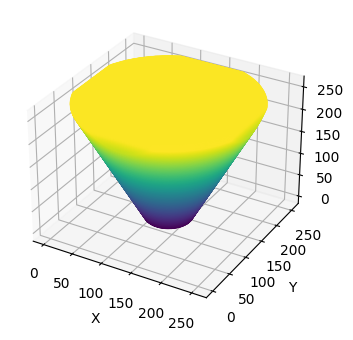

In [4]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
data = window
x, y, z = data.nonzero()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(x, y, z, c=z, alpha=.5)

## Reading Power Spectrum Data

In [51]:
# Open data file
filepath = "test_pk.txt"
#filepath = "C:/Users/lado/Downloads/test_pk.txt.ipynb"
file = open(filepath, "r")

# Define variables
k_in, P_in = np.loadtxt(filepath, unpack=True)
L = 1000
N = 256
b = 2
f = 1

# Create full power spectrum from data
P_c = lambda x : np.interp(x, k_in, P_in)
k_freq = np.fft.fftfreq(N, N/L)
kx, ky, kz = np.meshgrid(k_freq, k_freq, k_freq)
mu = kz / np.sqrt(kx**2 + ky**2 + kz**2)
mu[np.isnan(mu)] = 0
P_Mat = np.sqrt((b + f*mu**2)**2*P_c(np.sqrt(kx**2 + ky**2 + kz**2)))*np.exp(1j*2*np.pi*np.random.random([N, N, N]))

# Applies window to position data
Pos_Mat = ifft(P_Mat)
#Pos_Mat_Wind = window*Pos_Mat
#P_in_Recon = fft(Pos_Mat_Wind) 

C:\Users\lado\AppData\Local\Temp\ipykernel_26272\1938187767.py:17: RuntimeWarning: invalid value encountered in divide
  mu = kz / np.sqrt(kx**2 + ky**2 + kz**2)


In [54]:
Nb = 41
k_bins = np.linspace(0, 0.4, Nb)
dk = k_bins[2] - k_bins[1]
N_bins = np.zeros(Nb)
Pwin_avg = np.zeros(Nb)
P_avg = np.zeros(Nb)

for ix in range(N):
    for iy in range(N):
        for iz in range(N):
            kk = np.sqrt(kx[ix, iy, iz]**2 + ky[ix, iy, iz]**2+ kz[ix, iy, iz]**2)
            bins = int(kk/dk)
            if (bins > Nb - 1):
                continue
            N_bins[bins] += 1
            #Pwin_avg[bins] += np.abs(P_in_Recon[ix, iy, iz])
            P_avg[bins] += np.abs(P_Mat[ix, iy, iz]) 

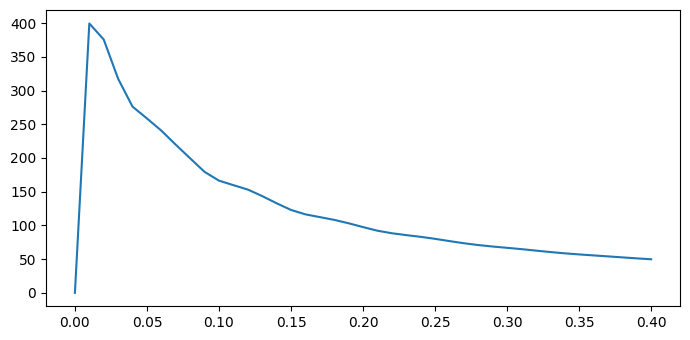

In [57]:
#plt.plot(k_bins, Pwin_avg/N_bins)
plt.plot(k_bins, P_avg/N_bins)

## Using Real Data

In [9]:
# Open data file
filepath = "C:/Users/lado/Downloads/AbacusSummit_c000_LRG_z0.5.txt"
file = open(filepath, "r")

# Define variables
x_dat, y_dat, z_dat = np.loadtxt(filepath, unpack = True)


In [10]:
count_mat = np.zeros((N, N, N))
start = min(min(x_dat), min(y_dat), min(z_dat))
end = max(max(x_dat), max(y_dat), max(z_dat))
binsize = (end - start)/(N-1)

for i in range(len(x_dat)):
    x_bin = int(x_dat[i]/binsize)  
    y_bin = int(y_dat[i]/binsize) 
    z_bin = int(z_dat[i]/binsize) 
    count_mat[x_bin, y_bin, z_bin] += 1     

In [38]:
delta = (count_mat/(binsize**3) - len(x_dat)/(end-start)**3)/(len(x_dat)/(end - start)**3)
count_mat_win = count_mat * window
delta_win =  (count_mat_win/(binsize**3) - len(x_dat)/(end-start)**3)/(len(x_dat)/(end - start)**3)
delta_hat = fft(delta_win)
delta_nw_hat = fft(delta)

In [42]:
bin_no = 21
k_bins = np.linspace(0, 0.2, bin_no)
dk = k_bins[2] - k_bins[1]
k_freq = np.fft.fftfreq(N, (end-start)/N)
N_bins = np.zeros(bin_no)
Pwin_avg = np.zeros(bin_no)
P_avg = np.zeros(bin_no)

for ix in range(N):
    for iy in range(N):
        for iz in range(N):
            kk = np.sqrt(k_freq[ix]**2 + k_freq[iy]**2 + k_freq[iz]**2)
            bins = int(kk/dk)
            if (bins > bin_no-1):
                continue
            N_bins[bins] += 1
            P_avg[bins] += np.abs(delta_hat[ix, iy, iz])**2
            Pwin_avg[bins] += np.abs(delta_nw_hat[ix, iy, iz])**2

In [36]:
delta_win

array([[[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [ 0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]],

       [[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ...,  0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]],

       [[-0., -0., -0., ...,  0., -0., -0.],
        [-0., -0., -0., ...,  0.,  0., -0.],
        [-0., -0., -0., ...,  0., -0., -0.],
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0.,  0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]],

       ...,

       [[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.

C:\Users\lado\AppData\Local\Temp\ipykernel_26272\1684570640.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(k_bins, P_avg/N_bins)
C:\Users\lado\AppData\Local\Temp\ipykernel_26272\1684570640.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(k_bins, Pwin_avg/N_bins)


C:\Users\lado\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


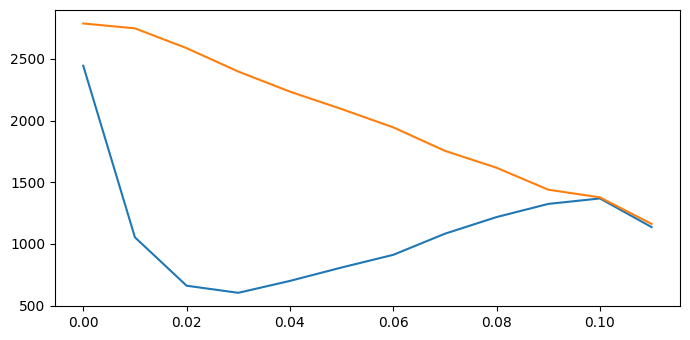

In [43]:
plt.plot(k_bins, P_avg/N_bins)
plt.plot(k_bins, Pwin_avg/N_bins)

In [41]:
Pwin_avg/N_bins

C:\Users\lado\AppData\Local\Temp\ipykernel_26272\1889028624.py:1: RuntimeWarning: invalid value encountered in divide
  Pwin_avg/N_bins


array([ 1032.78441478,            nan,            nan, 23419.0382058 ,
       17115.88787199,   510.19697067, 10054.18910509,   607.50237897,
        3275.7732174 ,  6070.38602442,  2135.62431003,  3322.32022855,
        4763.59726557,  1951.11032619,  3110.95787529,  3956.3198409 ,
        2100.22141561,  2709.60716078,  3974.3943715 ,  2151.52627744,
        2535.76290002])